# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=300)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


205

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_limit = 60
query_count = 0

columns = ['City Name', 'Country', 'Latitude', 'Longitude', 'Date', 'Tempurature', 'Humidity', 'Cloudiness', 'Wind Speed' ]


#Create empty lists to store openweather data
city_name, country, city_lat, city_lon, date, temp, humid, cloud, wind = ([] for i in range(len(columns)))


# Loop through the list of cities and perform a request for data on each
      #per API, only 60 requests per minute
for count in range(len(cities)):
    
    #Pause after 60 requests
    if query_count == query_limit:
        time.sleep(60)
        query_count = 0
        
    else: 
        query_count += 1
        
        try:
            response = requests.get(query_url + cities[count]).json() 
            print(f'Processing index {count}, city name: {cities[count]}')

            city_name.append(response["name"])
            country.append(response["sys"]["country"])
            city_lat.append(response["coord"]["lat"])
            city_lon.append(response["coord"]["lon"])
            temp.append(response["main"]["temp_max"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            date.append(response["dt"])

        except (KeyError, IndexError):
            print(f'Cannot find weather data for city {cities[count]}')

        


Processing index 0, city name: caravelas
Processing index 1, city name: bargal
Cannot find weather data for city bargal
Processing index 2, city name: sarkand
Processing index 3, city name: aklavik
Processing index 4, city name: kalemie
Processing index 5, city name: puerto ayora
Processing index 6, city name: kasongo-lunda
Processing index 7, city name: talnakh
Processing index 8, city name: anadyr
Processing index 9, city name: salamiyah
Processing index 10, city name: hobart
Processing index 11, city name: dabat
Processing index 12, city name: blagoyevo
Processing index 13, city name: mayor pablo lagerenza
Processing index 14, city name: sanger
Processing index 15, city name: lompoc
Processing index 16, city name: enshi
Processing index 17, city name: husavik
Processing index 18, city name: avarua
Processing index 19, city name: yarada
Processing index 20, city name: cherskiy
Processing index 21, city name: hermanus
Processing index 22, city name: tasiilaq
Processing index 23, city 

Processing index 178, city name: maine-soroa
Processing index 179, city name: aykhal
Processing index 180, city name: yar-sale
Processing index 181, city name: palana
Processing index 183, city name: taolanaro
Cannot find weather data for city taolanaro
Processing index 184, city name: kaitangata
Processing index 185, city name: ormara
Processing index 186, city name: namtsy
Processing index 187, city name: leningradskiy
Processing index 188, city name: gorom-gorom
Processing index 189, city name: denpasar
Processing index 190, city name: evanston
Processing index 191, city name: grandview
Processing index 192, city name: antalaha
Processing index 193, city name: progreso
Processing index 194, city name: houma
Processing index 195, city name: barentsburg
Cannot find weather data for city barentsburg
Processing index 196, city name: chagda
Cannot find weather data for city chagda
Processing index 197, city name: sao jose da coroa grande
Processing index 198, city name: okhotsk
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
raw_temp_df = pd.DataFrame({"City Name": city_name, "Country": country, "Latitude": city_lat, "Longitude": city_lon, 
                            "Date":date, "Temp": temp, "Humidity":humid, "Cloud Coverage":cloud, "Wind Speed": wind})

temp_df = raw_temp_df.dropna()

temp_df.head()


,City Name,Country,Latitude,Longitude,Date,Temp,Humidity,Cloud Coverage,Wind Speed
0,Caravelas,BR,-17.73,-39.27,1570734925,81.28,58,10,13.01
1,Sarkand,KZ,45.41,79.91,1570734925,56.62,37,0,4.93
2,Aklavik,CA,68.22,-135.01,1570734925,32.00,77,40,5.12
3,Kalemie,CD,-5.95,29.20,1570734925,72.64,59,0,1.43
4,Puerto Ayora,EC,-0.74,-90.35,1570734926,73.40,60,33,19.46


In [5]:
#export to csv
# Note to avoid any issues later, use encoding="utf-8"
temp_df.to_csv("../cities.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
time_stamp = pd.to_datetime(date[0], unit = 's')

format_time = time_stamp.strftime('%b/%d/%Y')


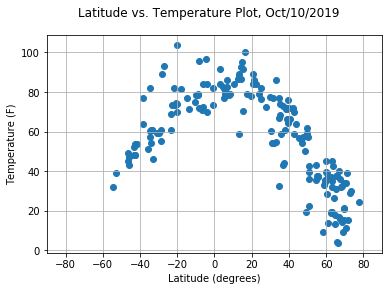

In [7]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Temperature Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Temperature (F)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(temp) - 5, np.max(temp) + 5)
ax.scatter(city_lat, temp)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Temp_Plot.png")

plt.show()

#### Latitude vs. Humidity Plot

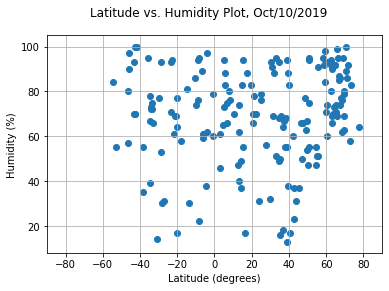

In [8]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Humidity Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Humidity (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(humid) - 5, np.max(humid) + 5)
ax.scatter(city_lat, humid)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Humidity_Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

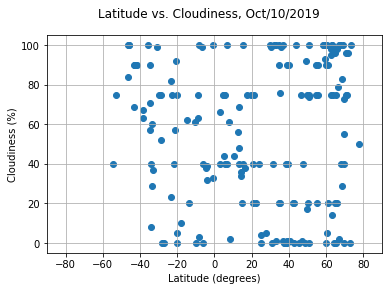

In [9]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Cloudiness, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(cloud) - 5, np.max(cloud) + 5)
ax.scatter(city_lat, cloud)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Cloudiness_Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

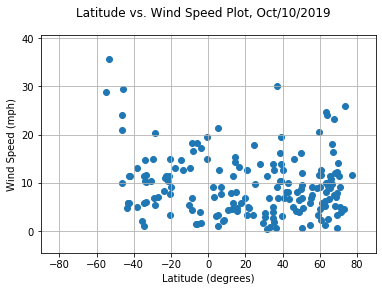

In [10]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Wind Speed Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(wind) - 5, np.max(wind) + 5)
ax.scatter(city_lat, wind)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_WindSpeed_Plot.png")

plt.show()